In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from nmf_son.base import nmf_son
from nmf_son.other_vers import nmf_son_alt, update_wj_subgrad, update_wj_smoothing

np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
def plot_scores(fscores, gscores, lambda_vals, reg_val):
    def plot_ax(ax, f, g, total):
        ax.plot(total, color='black', linewidth=3, label='total')
        ax.plot(f, color='cyan', linewidth=1.5, label='f')
        ax.plot(g, color='yellow', linewidth=1.5, label='g')
        ax.legend()

    total_score = fscores + lambda_vals * gscores
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(f'lambda = {reg_val}', fontsize=25)

    axs[0].set_yscale('log')
    plot_ax(axs[0], fscores, gscores, total_score)
    axs[0].set_title('log scale', fontsize=16)

    axs[1].set_yscale('log')
    plot_ax(axs[1], fscores - fscores[-1], gscores - gscores[-1], total_score - total_score[-1])
    axs[1].set_title('log(score - score*)', fontsize=16)

def plot_matrices(W, H, img_size, comparison_idxs):
    fig, axs = plt.subplots(2, len(comparison_idxs), figsize=(20, 10), sharey='row')

    for i, idx in enumerate(comparison_idxs):
        axs[0, i].plot(W[:, idx] / np.dot(W[:, idx], W[:, idx]))
        axs[0, i].set_title(f'W({idx+1})')

        h_idx_3d = H[idx, :].reshape(img_size, order='F')
        axs[1, i].plot(h_idx_3d)
        axs[1, i].set_title(f'H({idx+1})')

def plot_images(H, img_size, comparison_idxs):
    fig, axs = plt.subplots(1, len(comparison_idxs), figsize=(20, 10))

    for i, idx in enumerate(comparison_idxs):
        h_idx_3d = H[idx, :].reshape(img_size, order='F')

        axs[i].imshow(h_idx_3d)
        img = axs[i].imshow(h_idx_3d, cmap='gray')
        divider = make_axes_locatable(axs[i])

        cax = divider.append_axes('right', size='5%', pad=0.1)
        fig.colorbar(img, cax=cax, orientation='vertical')
        axs[i].set_title(f'H({idx+1})')

In [3]:
X = np.load('datasets/jasper_full.npz')['X']
rank = 8

data = np.load(f'saved_models/jasper/jasper_full_r{rank}_ini.npz')
ini_W = data['W']
ini_H = data['H']

reg = 15
save_filepath = 'saved_models/urban/acc_testing/r{}_l{}_{}.npz'

In [4]:
aa_size = 2
max_iter = 3000

In [5]:
%%time
Wb_admm, Hb_admm, Wl_admm, Hl_admm, fscores_admm, gscores_admm, lambda_vals_admm = nmf_son(X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, verbose=True)

Iteration: 1, f=397413.7440903846, g=169512.5307555088,  total=34834639437.353676
Iteration: 2, f=211253.7090385908, g=19383.2822760129,  total=892900.9077210464
Iteration: 3, f=134224.90844295468, g=19540.967642655345,  total=3328809.1645541736
Iteration: 4, f=114529.14642795298, g=18067.62210091433,  total=1976098.875183404
Iteration: 5, f=105367.67909517376, g=16853.771181273845,  total=1707887.3826030672
Iteration: 6, f=99589.28992822542, g=15954.472597045527,  total=1595769.9345955304
Iteration: 7, f=95212.3652763949, g=15291.806522136123,  total=1527005.372531322
Iteration: 8, f=91701.33205402677, g=14779.805142383912,  total=1472068.2009653607
Iteration: 9, f=88713.78131063051, g=14352.243098142026,  total=1424441.6180957833
Iteration: 10, f=85867.89045426989, g=13960.998216239619,  total=1380299.291348586
Iteration: 11, f=82452.6299128876, g=13578.150810585392,  total=1335150.12508771
Iteration: 12, f=77926.50700584597, g=13192.980201481912,  total=1279632.0218166031
Iteration:

In [6]:
%%time
Wb_subgrad, Hb_subgrad, Wl_subgrad, Hl_subgrad, fscores_subgrad, gscores_subgrad, lambda_vals_subgrad = nmf_son_alt(update_wj_subgrad, X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, verbose=True)

Iteration: 1, f=454215.0326937719, g=12987.695564583079,  total=2669380981.7398515
Iteration: 2, f=281607.5406107254, g=14381.543412297033,  total=7826032.776081386
Iteration: 3, f=160404.5357483879, g=14468.897372810168,  total=4410175.044755877
Iteration: 4, f=121469.57090545844, g=14605.866544881152,  total=2550314.5429527727
Iteration: 5, f=103200.89710196819, g=14624.217153843263,  total=1927533.6510474896
Iteration: 6, f=93495.06638351487, g=14608.362303135555,  total=1639830.2435228585
Iteration: 7, f=87145.44351418184, g=14591.45909757566,  total=1487948.7046716888
Iteration: 8, f=82059.47503906522, g=14582.10484859882,  total=1388403.1236457152
Iteration: 9, f=77663.99295590428, g=14582.061155671745,  total=1308552.4303720032
Iteration: 10, f=73878.81277017693, g=14590.38140731385,  total=1239503.411458173
Iteration: 11, f=70718.9437866886, g=14599.123429949655,  total=1179565.11755699
Iteration: 12, f=68139.79903724485, g=14610.072882280585,  total=1129719.5519303132
Iteratio

In [7]:
%%time
Wb_sm, Hb_sm, Wl_sm, Hl_sm, fscores_sm, gscores_sm, lambda_vals_sm = nmf_son_alt(update_wj_smoothing, X, ini_W.copy(), ini_H.copy(), _lambda=reg, itermax=max_iter, verbose=True)

Iteration: 1, f=454215.0303812137, g=12975.879500406694,  total=2666952821.1912227
Iteration: 2, f=281607.55903383566, g=14368.786710926002,  total=7826204.7004914265
Iteration: 3, f=160404.63602376689, g=14456.044389289342,  total=4410169.896987329
Iteration: 4, f=121469.64714031338, g=14593.038198698694,  total=2550340.4893717244
Iteration: 5, f=103200.94690381404, g=14611.406286050076,  total=1927539.0404769478
Iteration: 6, f=93495.11903647319, g=14595.563708302481,  total=1639830.871191121
Iteration: 7, f=87145.4777234656, g=14578.668563061397,  total=1487948.87929545
Iteration: 8, f=82059.47219180272, g=14569.318104064128,  total=1388403.2382138646
Iteration: 9, f=77663.94766075171, g=14569.275096906611,  total=1308552.397068517
Iteration: 10, f=73877.94410191006, g=14577.770997546419,  total=1239516.4912156104
Iteration: 11, f=70716.86543821184, g=14586.404792522048,  total=1179542.3485225085
Iteration: 12, f=68138.68476188631, g=14597.366066923641,  total=1129688.7924719509
Ite

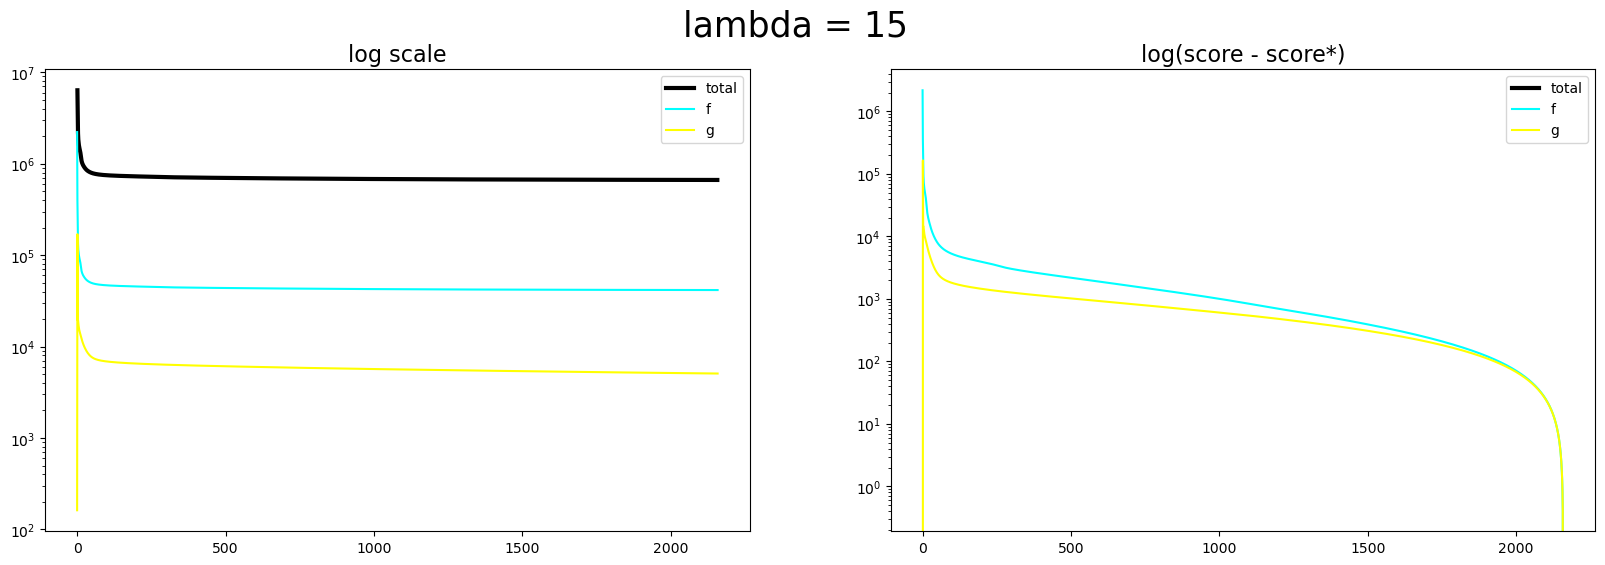

In [8]:
total_score_admm = fscores_admm + lambda_vals_admm * gscores_admm
total_score_subgrad = fscores_subgrad + lambda_vals_subgrad * gscores_subgrad
total_score_sm = fscores_sm + lambda_vals_sm * gscores_sm
plot_scores(fscores_admm, gscores_admm, lambda_vals_admm, reg)

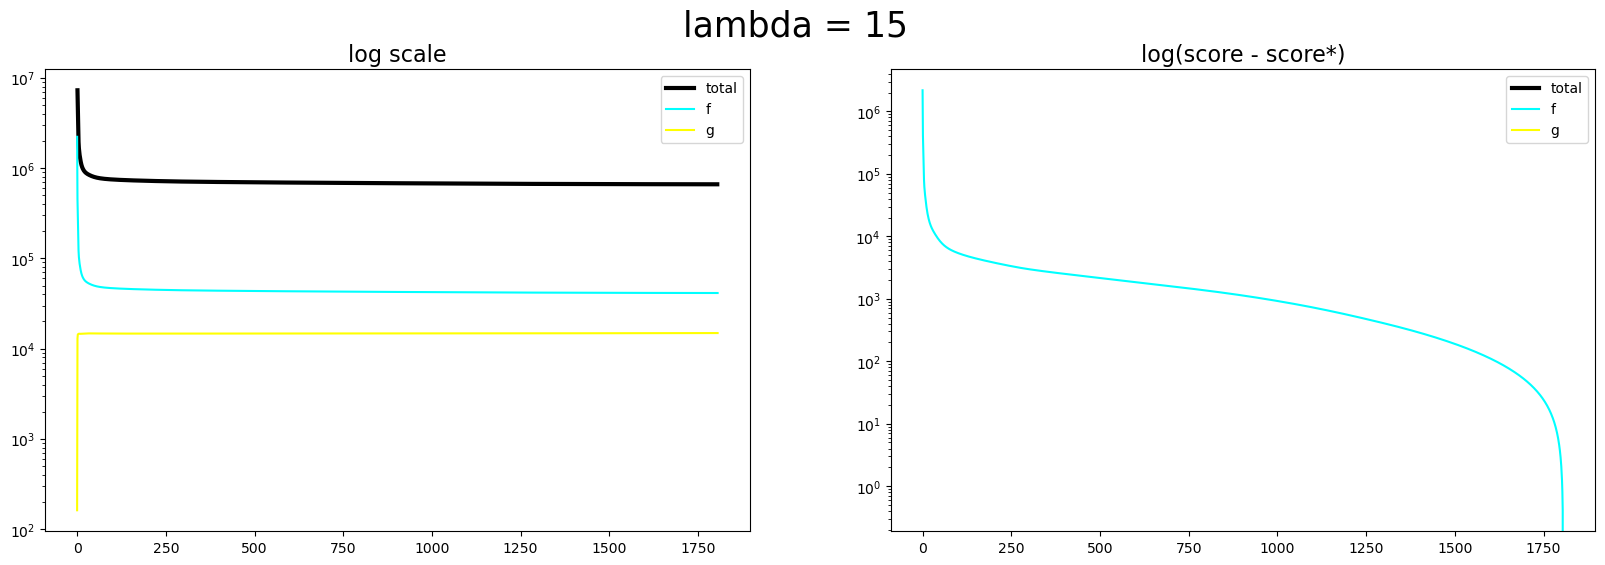

In [9]:
plot_scores(fscores_subgrad, gscores_subgrad, lambda_vals_subgrad, reg)

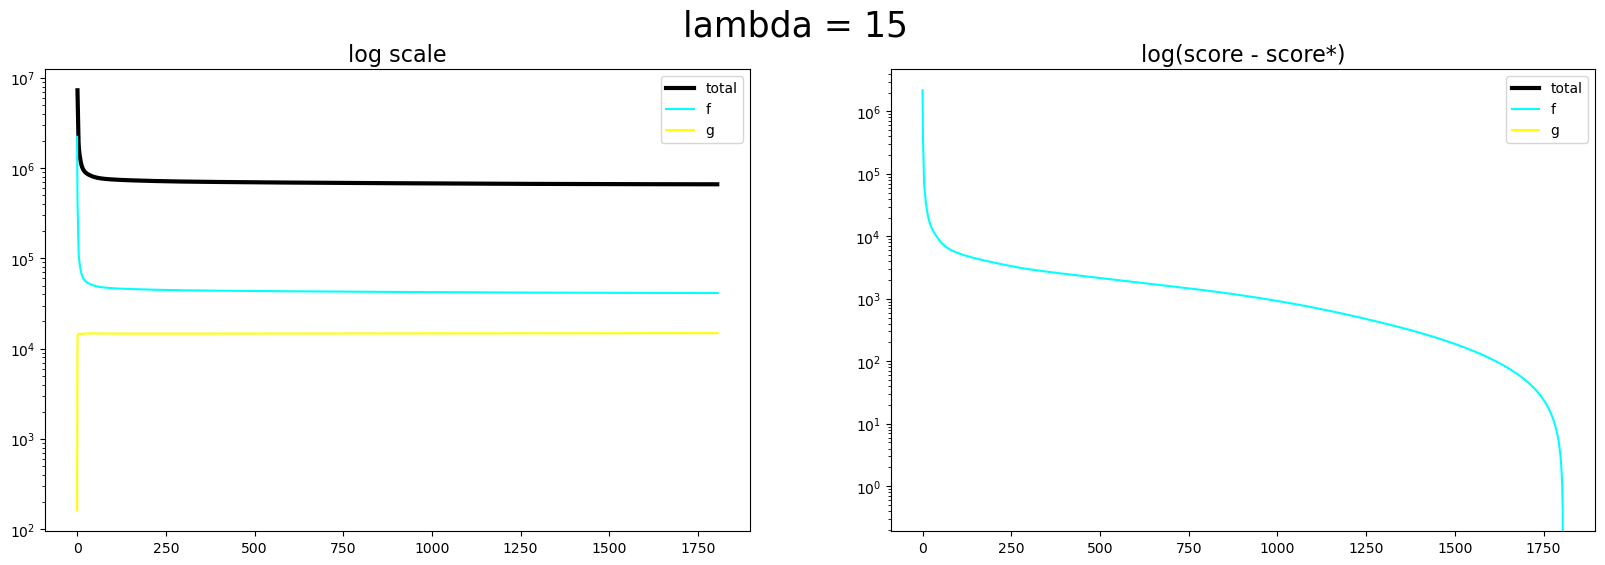

In [10]:
plot_scores(fscores_sm, gscores_sm, lambda_vals_sm, reg)